## Which jobs failed? Find out below...

In [1]:
!pip install rdkit

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta

from rdkit import Chem
from rdkit.Chem import Draw
import IPython.display as display
from IPython.display import HTML

In [3]:
import os 
import sys

# Get the current working directory
current_dir = os.getcwd()

# Get the parent directory
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))

# Add the parent directory to the system path
sys.path.insert(0, parent_dir)

import os_navigation as os_nav

In [4]:
from dft.job_monitor import JobMonitor
import dft.molecule as mol

In [5]:
job_monitor = JobMonitor()
job_log = job_monitor.read_log()
error_jobs = job_log[job_log['job_status'] == 'ERROR'].copy()

In [30]:
def job_id_to_molecule(job_id):
    mol_id = int(job_id.split('_')[1])

    return mol.Molecule.from_id(mol_id, source=os.path.join(os_nav.find_project_root(), 'data', 'mols', 'wittig_molecules.csv'))

In [31]:
error_jobs['runtime_seconds'] = error_jobs['runtime'].map(JobMonitor.time_string_to_seconds)
error_jobs['molecules'] = error_jobs['job_id'].map(job_id_to_molecule)

immediate_fails = error_jobs[error_jobs['runtime_seconds'] < 60]
later_fails = error_jobs[error_jobs['runtime_seconds'] >= 60]

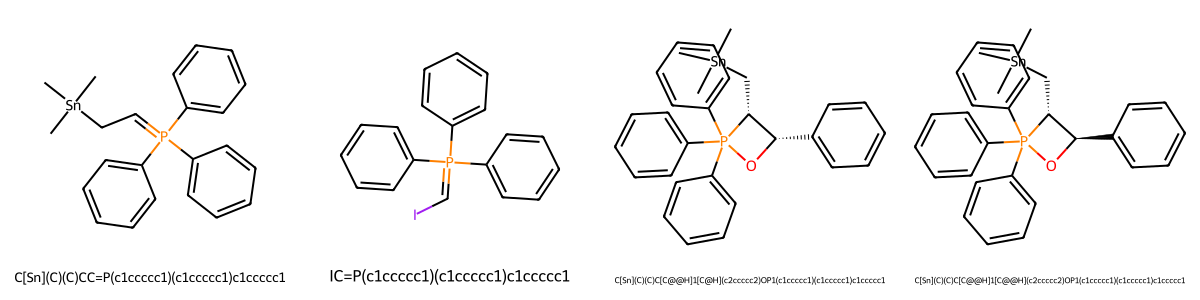

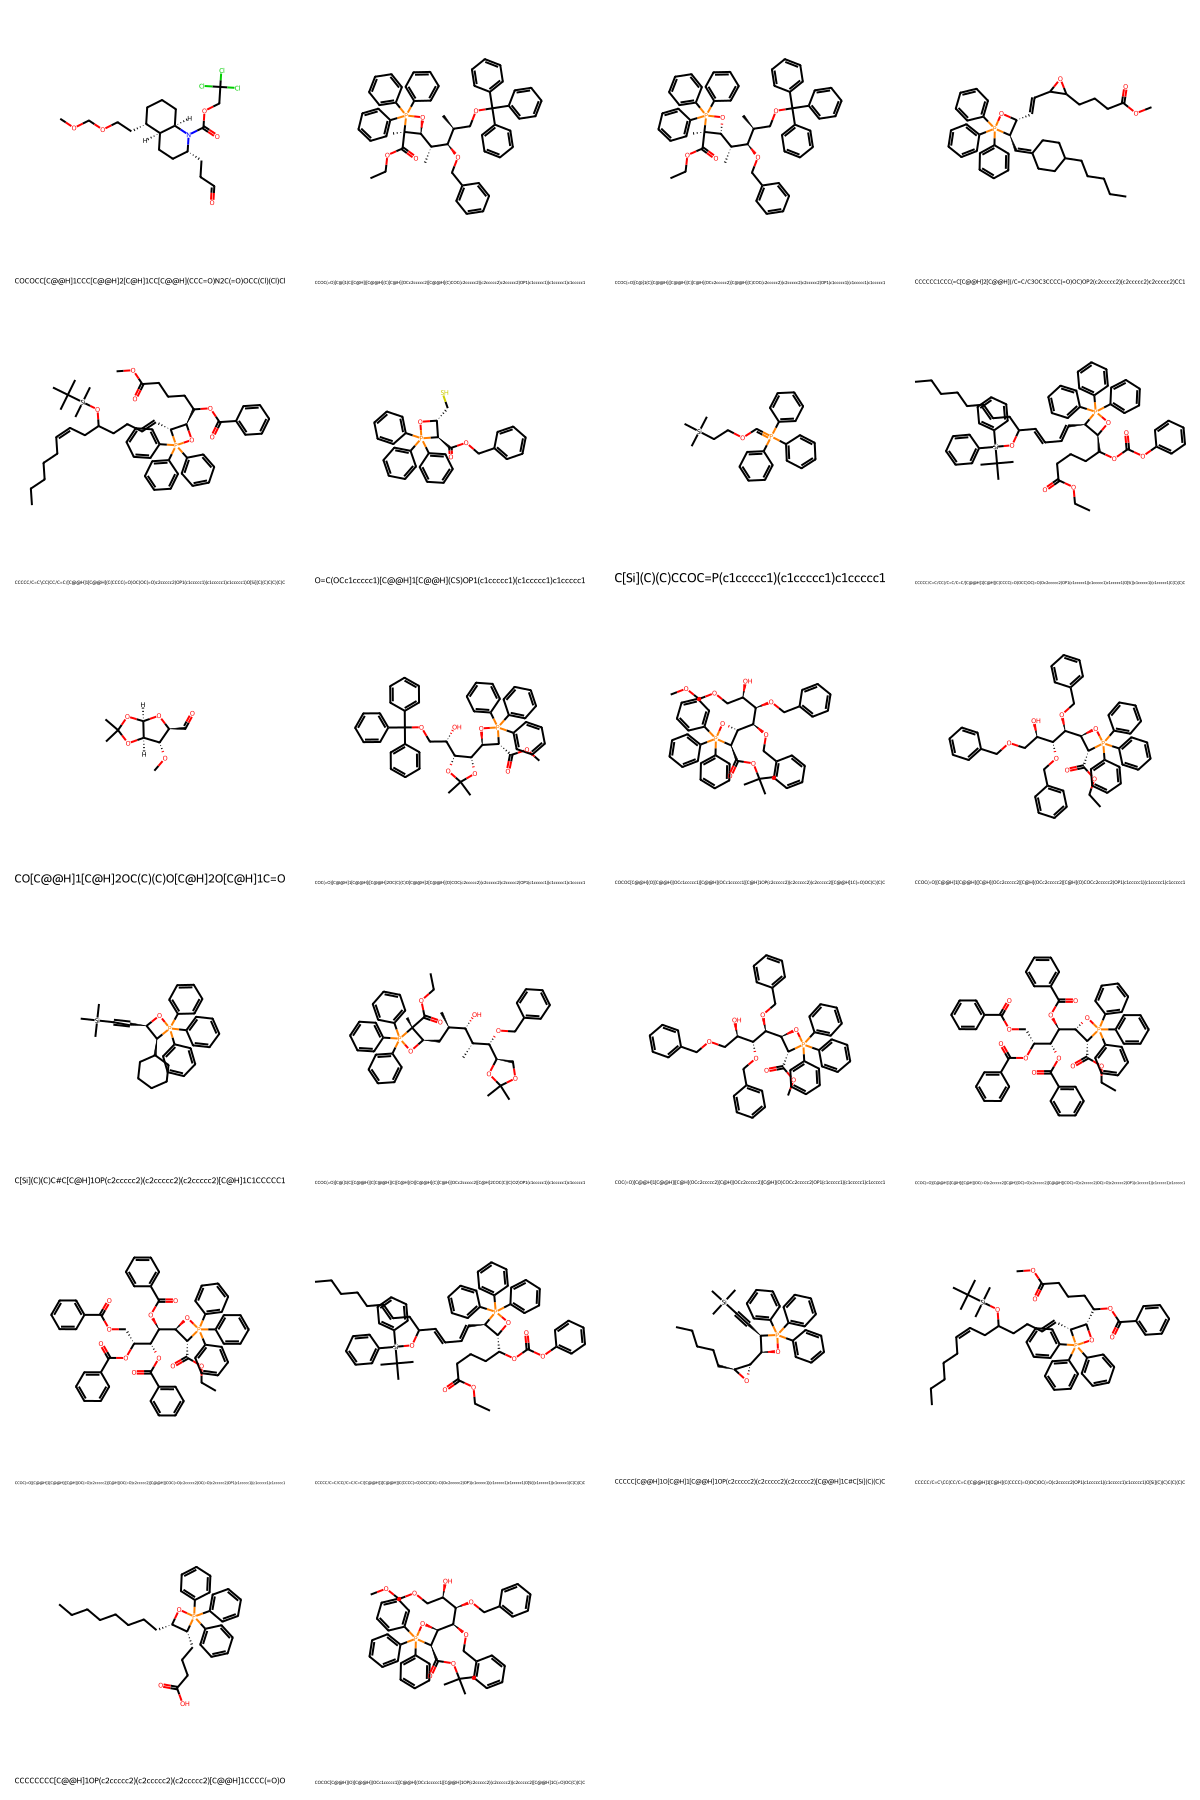

In [32]:
# Extract RDKit mol objects from the Molecule instances
immediate_fail_mols = [m.molecule for m in immediate_fails['molecules']]
later_fail_mols = [m.molecule for m in later_fails['molecules']]

# Visualize immediate fails
img_immediate_fails = Draw.MolsToGridImage(immediate_fail_mols, molsPerRow=4, subImgSize=(300, 300), legends=[m.canonical_smiles for m in immediate_fails['molecules']])
display.display(img_immediate_fails)

# Visualize later fails
img_later_fails = Draw.MolsToGridImage(later_fail_mols, molsPerRow=4, subImgSize=(300, 300), legends=[m.canonical_smiles for m in later_fails['molecules']])


display.display(HTML("<hr style='border: 2px solid black; margin: 20px 0;'>"))
# Display the image directly in Jupyter notebook
display.display(img_later_fails)

In [33]:
[m.canonical_smiles for m in immediate_fails['molecules']]

['C[Sn](C)(C)CC=P(c1ccccc1)(c1ccccc1)c1ccccc1',
 'IC=P(c1ccccc1)(c1ccccc1)c1ccccc1',
 'C[Sn](C)(C)C[C@@H]1[C@H](c2ccccc2)OP1(c1ccccc1)(c1ccccc1)c1ccccc1',
 'C[Sn](C)(C)C[C@@H]1[C@@H](c2ccccc2)OP1(c1ccccc1)(c1ccccc1)c1ccccc1']

In [34]:
[m.canonical_smiles for m in later_fails['molecules']]

['COCOCC[C@@H]1CCC[C@@H]2[C@H]1CC[C@@H](CCC=O)N2C(=O)OCC(Cl)(Cl)Cl',
 'CCOC(=O)[C@]1(C)[C@H]([C@@H](C)[C@H](OCc2ccccc2)[C@@H](C)COC(c2ccccc2)(c2ccccc2)c2ccccc2)OP1(c1ccccc1)(c1ccccc1)c1ccccc1',
 'CCOC(=O)[C@]1(C)[C@@H]([C@@H](C)[C@H](OCc2ccccc2)[C@@H](C)COC(c2ccccc2)(c2ccccc2)c2ccccc2)OP1(c1ccccc1)(c1ccccc1)c1ccccc1',
 'CCCCCC1CCC(=C[C@@H]2[C@@H](/C=C/C3OC3CCCC(=O)OC)OP2(c2ccccc2)(c2ccccc2)c2ccccc2)CC1',
 'CCCCC/C=C\\CC(CC/C=C/[C@@H]1[C@@H](C(CCCC(=O)OC)OC(=O)c2ccccc2)OP1(c1ccccc1)(c1ccccc1)c1ccccc1)O[Si](C)(C)C(C)(C)C',
 'O=C(OCc1ccccc1)[C@@H]1[C@@H](CS)OP1(c1ccccc1)(c1ccccc1)c1ccccc1',
 'C[Si](C)(C)CCOC=P(c1ccccc1)(c1ccccc1)c1ccccc1',
 'CCCCC/C=C/CC(/C=C/C=C/[C@@H]1[C@H](C(CCCC(=O)OCC)OC(=O)Oc2ccccc2)OP1(c1ccccc1)(c1ccccc1)c1ccccc1)O[Si](c1ccccc1)(c1ccccc1)C(C)(C)C',
 'CO[C@@H]1[C@H]2OC(C)(C)O[C@H]2O[C@H]1C=O',
 'COC(=O)[C@@H]1[C@@H]([C@@H]2OC(C)(C)O[C@@H]2[C@@H](O)COC(c2ccccc2)(c2ccccc2)c2ccccc2)OP1(c1ccccc1)(c1ccccc1)c1ccccc1',
 'COCOC[C@@H](O)[C@@H](OCc1ccccc1)[C@@H](OCc1ccccc1)[C

In [40]:
smi = 'O1CCCC1'
Chem.CanonSmiles(smi)

'C1CCOC1'